# PROJET SCORING

## Importation des bibliothèques

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import scipy.stats as stats
from IPython.display import display
from scipy.stats import chi2_contingency
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_val_predict
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Visualisation des données

## Lecture et aperçu des données HMEQ

In [5]:
df = pd.read_csv('data/hmeq.csv')
print("="*50)
print("Aperçu des premières lignes du jeu de données HMEQ :")
print("="*50)
print(df.head())
print("\n" + "="*50)
print("Informations générales sur le jeu de données :")
print("="*50)
df.info()
print("\n" + "="*50)
print("Statistiques descriptives des variables numériques :")
print("="*50)
print(df.describe())


Aperçu des premières lignes du jeu de données HMEQ :
   BAD  LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
0    1  1100  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   
1    1  1300  70053.0   68400.0  HomeImp   Other   7.0    0.0     2.0   
2    1  1500  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0   
3    1  1500      NaN       NaN      NaN     NaN   NaN    NaN     NaN   
4    0  1700  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   

        CLAGE  NINQ  CLNO  DEBTINC  
0   94.366667   1.0   9.0      NaN  
1  121.833333   0.0  14.0      NaN  
2  149.466667   1.0  10.0      NaN  
3         NaN   NaN   NaN      NaN  
4   93.333333   0.0  14.0      NaN  

Informations générales sur le jeu de données :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     596

## Analyse des Distributions et des Propriétés Statistiques des Variables Numériques

In [6]:
numeric_columns = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']
skewness = df[numeric_columns].skew()
kurtosis = df[numeric_columns].kurtosis()
print("="*50)
print("### Skewness (Asymétrie) des variables ###")
print("="*50)
print(skewness)
print("\n" + "="*50)
print("### Kurtosis (Aplatissement) des variables ###")
print("="*50)
print(kurtosis)

### Skewness (Asymétrie) des variables ###
LOAN       2.023781
MORTDUE    1.814481
VALUE      3.053344
YOJ        0.988460
DEROG      5.320870
DELINQ     4.023150
CLAGE      1.343412
NINQ       2.621984
CLNO       0.775052
DEBTINC    2.852353
dtype: float64

### Kurtosis (Aplatissement) des variables ###
LOAN        6.932590
MORTDUE     6.481866
VALUE      24.362805
YOJ         0.372072
DEROG      36.872763
DELINQ     23.565449
CLAGE       7.599549
NINQ        9.786507
CLNO        1.157673
DEBTINC    50.504042
dtype: float64


## Calcul du coefficient de Tschuprow entre différentes variables catégorielles

In [7]:
def tschuprow_coefficient(df, col1, col2):
    contingency_table = pd.crosstab(df[col1], df[col2])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    r, c = contingency_table.shape
    tschuprow = np.sqrt(chi2 / n) / np.sqrt(min(r - 1, c - 1))

    return tschuprow
coeff_tschuprow = tschuprow_coefficient(df, 'REASON', 'JOB')
print(f"Le coefficient de Tschuprow entre REASON et JOB est : {coeff_tschuprow}")
coeff_tschuprow = tschuprow_coefficient(df, 'REASON', 'BAD')
print(f"Le coefficient de Tschuprow entre REASON et BAD est : {coeff_tschuprow}")
coeff_tschuprow = tschuprow_coefficient(df, 'BAD', 'JOB')
print(f"Le coefficient de Tschuprow entre BAS et JOB est : {coeff_tschuprow}")

Le coefficient de Tschuprow entre REASON et JOB est : 0.1490023273179537
Le coefficient de Tschuprow entre REASON et BAD est : 0.03753006571307943
Le coefficient de Tschuprow entre BAS et JOB est : 0.1200924433699837


## Analyse de contingence des variables catégorielles

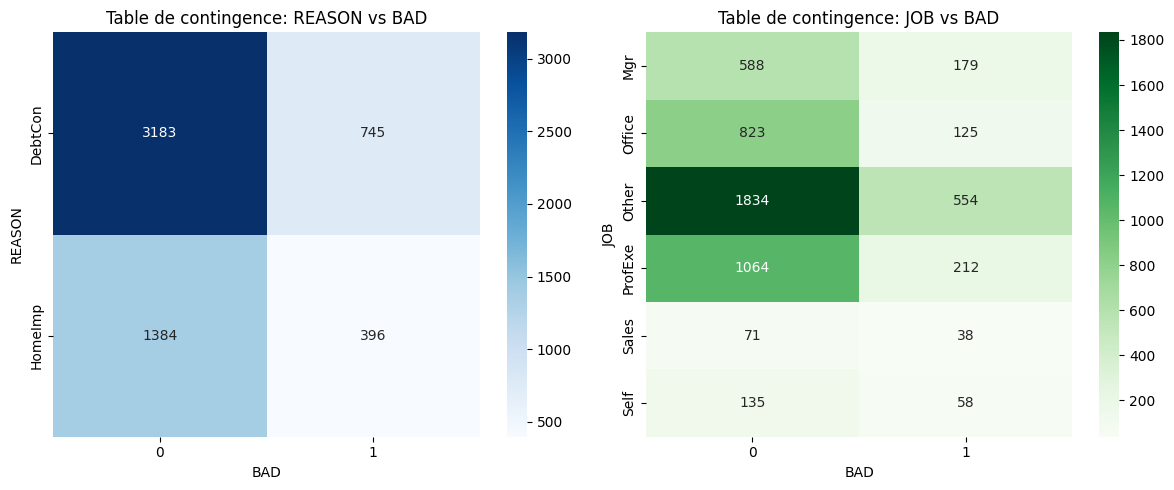

In [8]:
contingency_table_reason_bad = pd.crosstab(df['REASON'], df['BAD'])
contingency_table_job_bad = pd.crosstab(df['JOB'], df['BAD'])
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(contingency_table_reason_bad, annot=True, cmap="Blues", fmt="d")
plt.title("Table de contingence: REASON vs BAD")
plt.subplot(1, 2, 2)
sns.heatmap(contingency_table_job_bad, annot=True, cmap="Greens", fmt="d")
plt.title("Table de contingence: JOB vs BAD")
plt.tight_layout()
plt.show()

## Analyse Visuelle des Distributions, Outliers et Normalité des Variables Numériques

C:\Users\chemm\AppData\Local\Temp\ipykernel_60432\1004311754.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, kde=True, color='royalblue', bins=30)


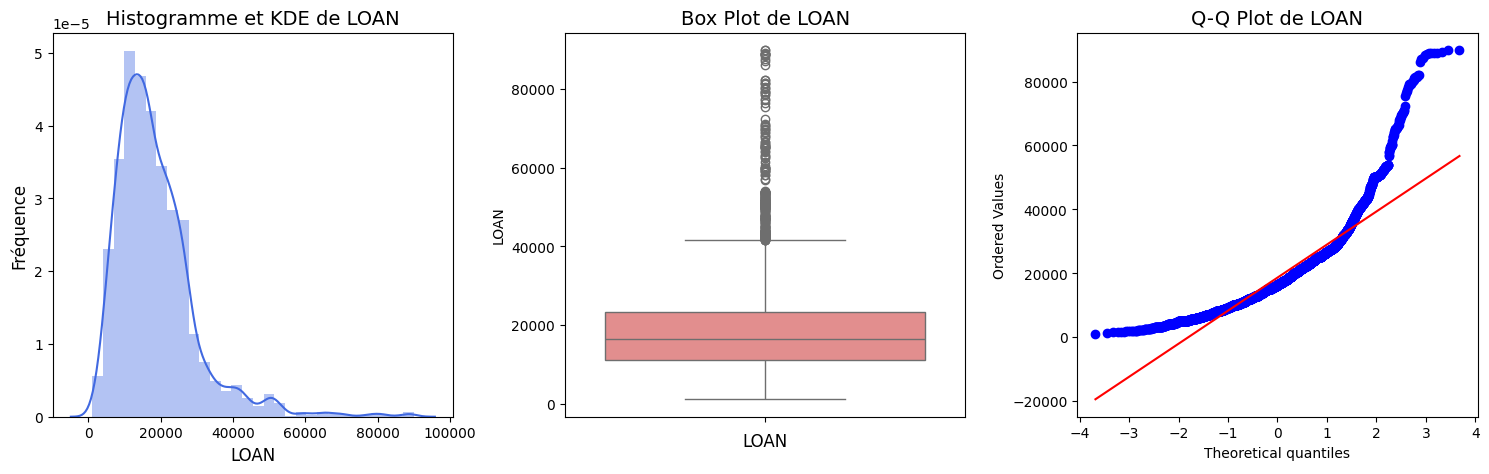

C:\Users\chemm\AppData\Local\Temp\ipykernel_60432\1004311754.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, kde=True, color='royalblue', bins=30)


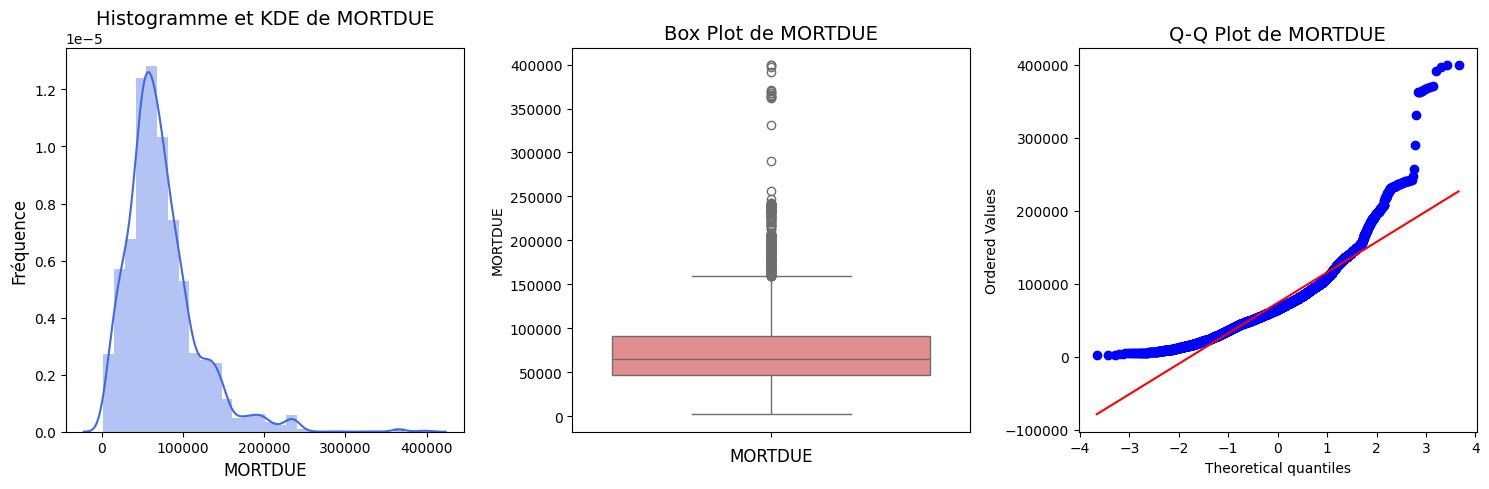

C:\Users\chemm\AppData\Local\Temp\ipykernel_60432\1004311754.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, kde=True, color='royalblue', bins=30)


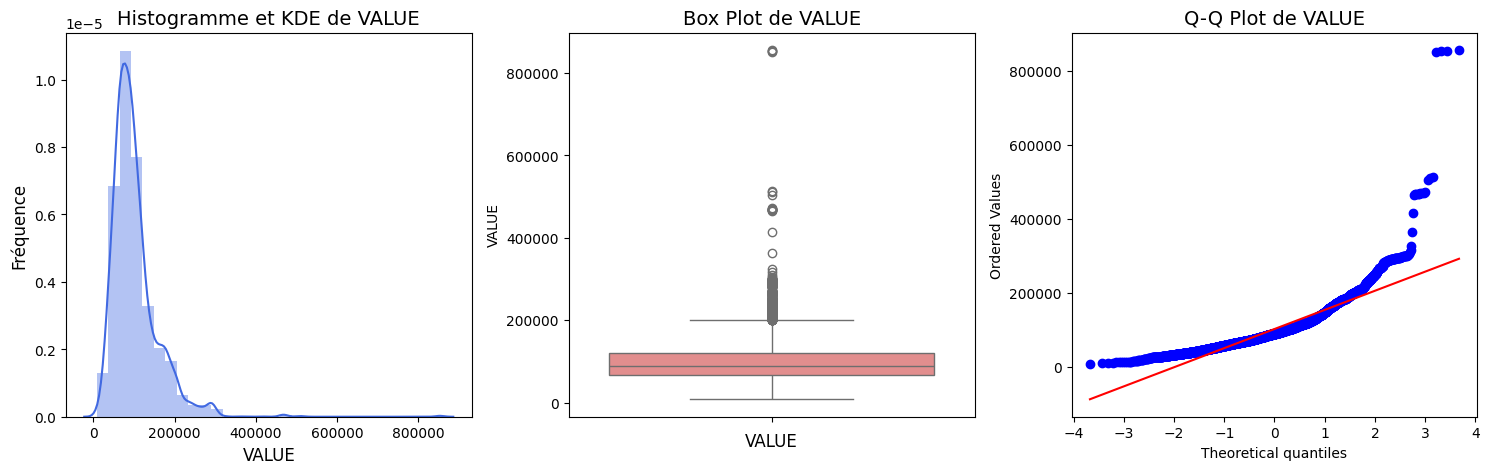

C:\Users\chemm\AppData\Local\Temp\ipykernel_60432\1004311754.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, kde=True, color='royalblue', bins=30)


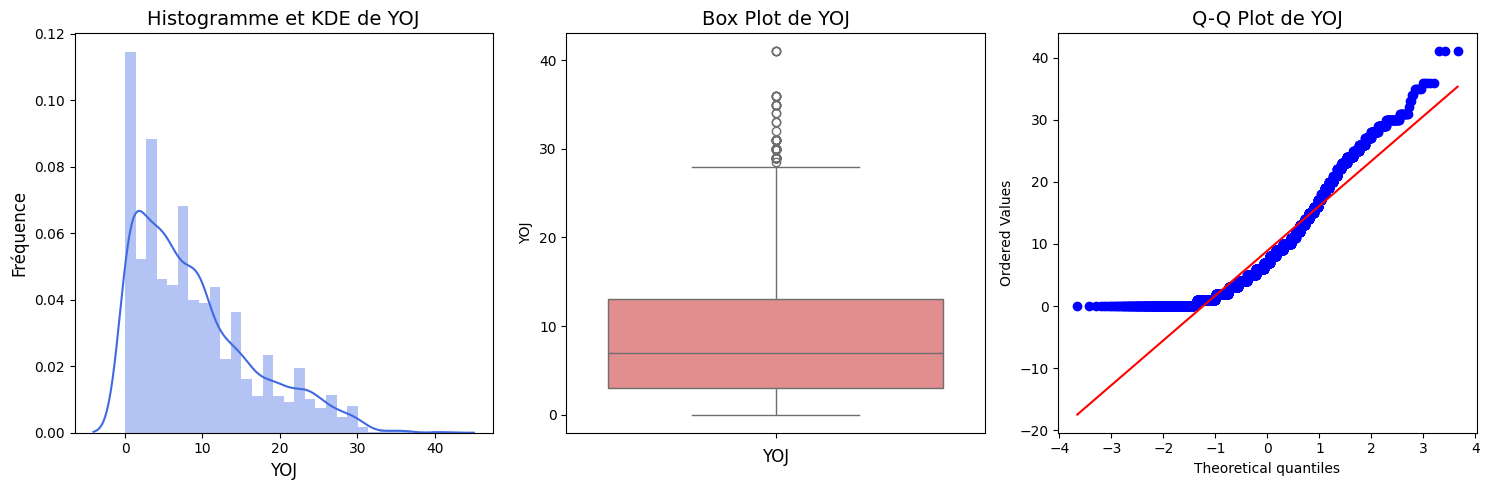

C:\Users\chemm\AppData\Local\Temp\ipykernel_60432\1004311754.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, kde=True, color='royalblue', bins=30)


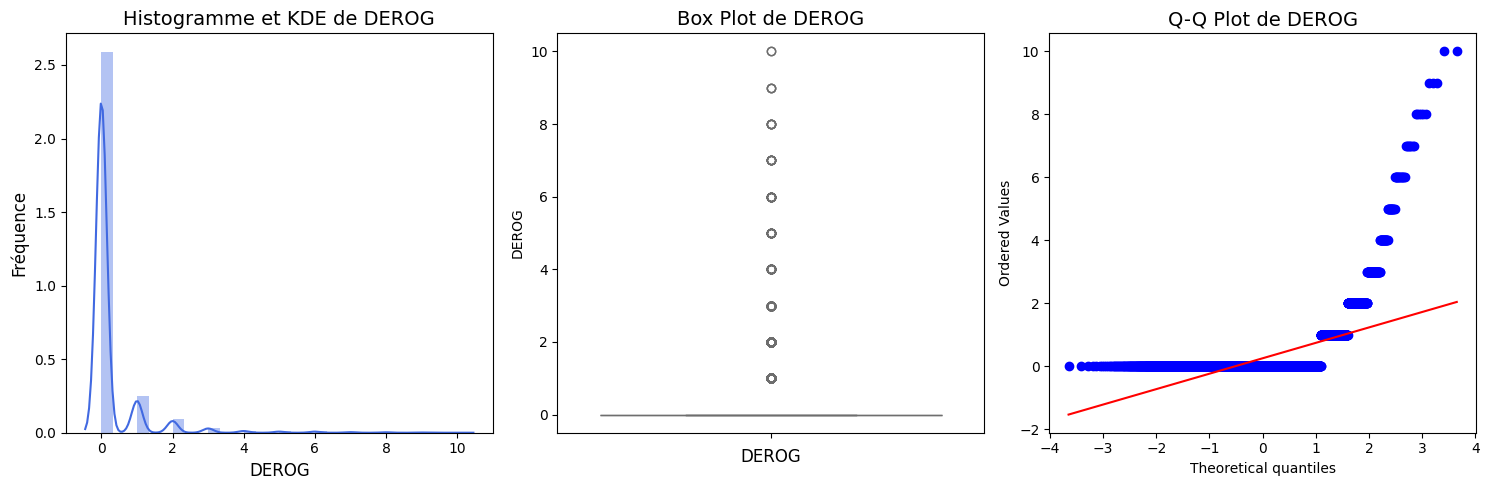

C:\Users\chemm\AppData\Local\Temp\ipykernel_60432\1004311754.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, kde=True, color='royalblue', bins=30)


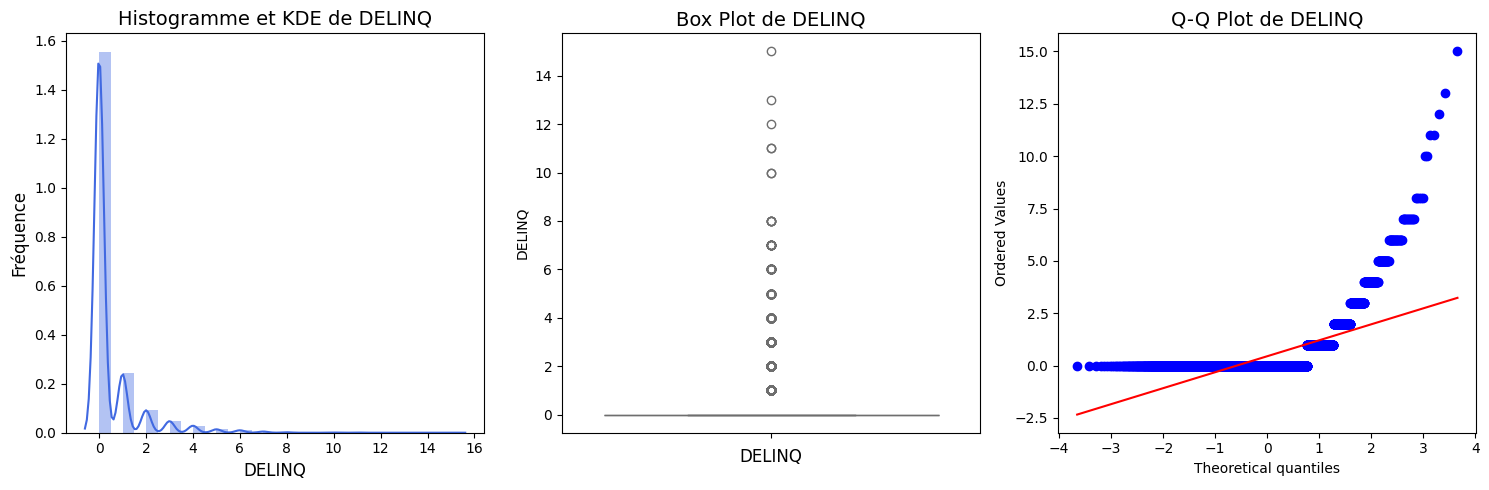

C:\Users\chemm\AppData\Local\Temp\ipykernel_60432\1004311754.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, kde=True, color='royalblue', bins=30)


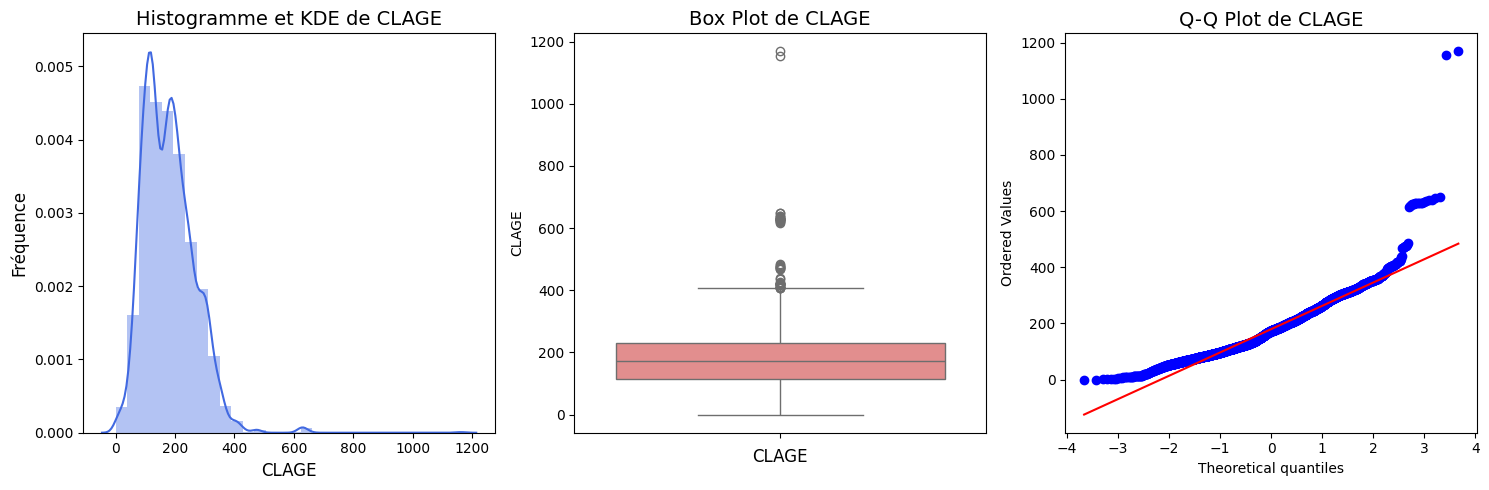

C:\Users\chemm\AppData\Local\Temp\ipykernel_60432\1004311754.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, kde=True, color='royalblue', bins=30)


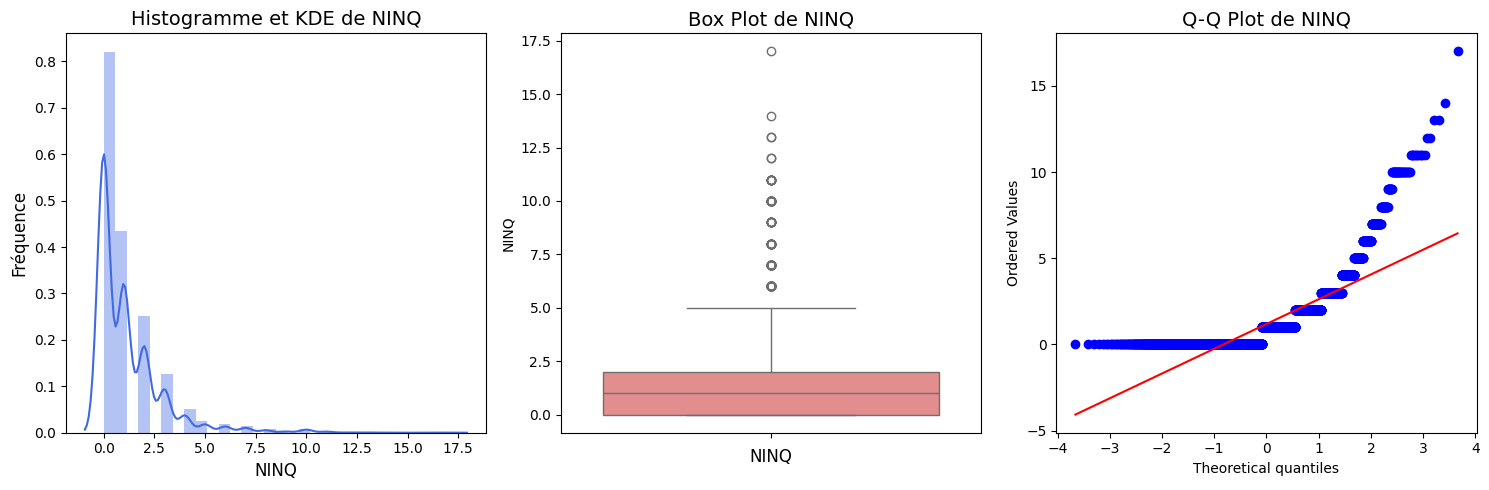

C:\Users\chemm\AppData\Local\Temp\ipykernel_60432\1004311754.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, kde=True, color='royalblue', bins=30)


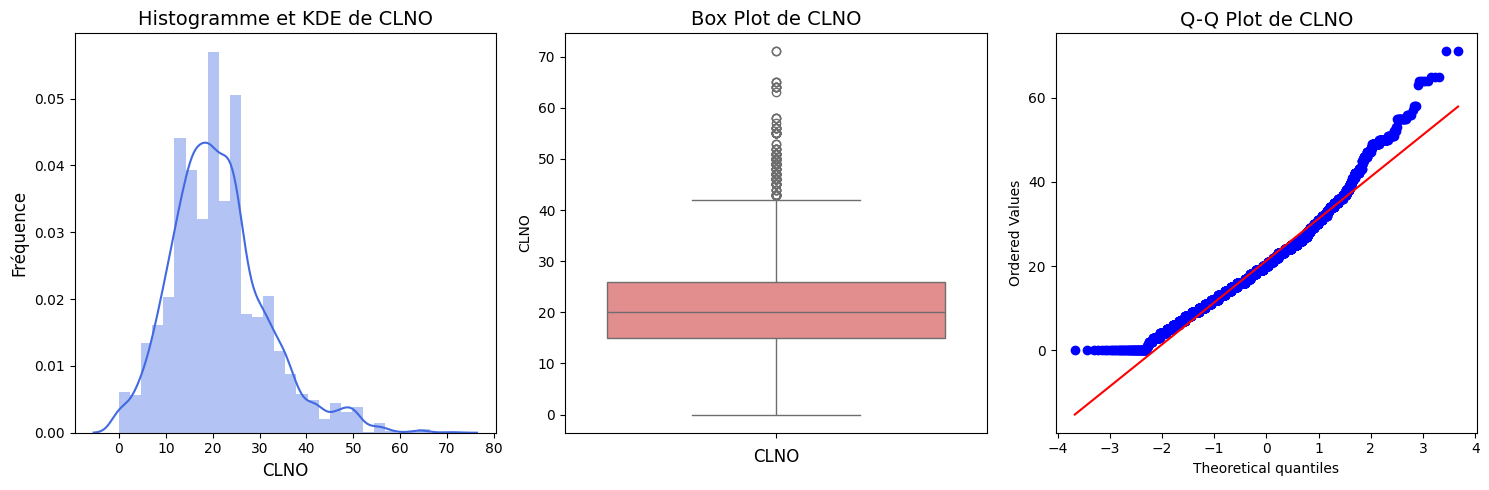

C:\Users\chemm\AppData\Local\Temp\ipykernel_60432\1004311754.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, kde=True, color='royalblue', bins=30)


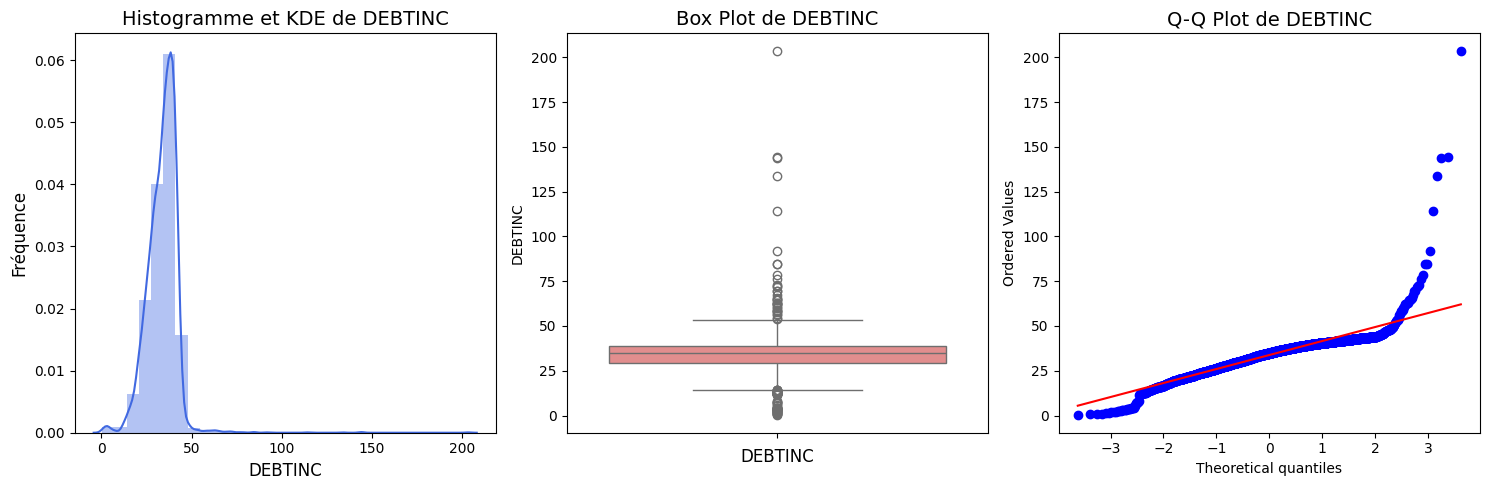

In [9]:
for col in numeric_columns:
    data = df[col].dropna()
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    sns.distplot(data, kde=True, color='royalblue', bins=30)
    plt.title(f'Histogramme et KDE de {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Fréquence', fontsize=12)
    plt.subplot(1, 3, 2)
    sns.boxplot(data, color='lightcoral')
    plt.title(f'Box Plot de {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.subplot(1, 3, 3)
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot de {col}', fontsize=14)
    plt.tight_layout()
    plt.show()

## Distribution des variables numériques par rapport à la variable BAD 

C:\Users\chemm\AppData\Local\Temp\ipykernel_60432\3378479501.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='BAD', y=var, data=df, palette='Set2')
C:\Users\chemm\AppData\Local\Temp\ipykernel_60432\3378479501.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='BAD', y=var, data=df, palette='Set2')
C:\Users\chemm\AppData\Local\Temp\ipykernel_60432\3378479501.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='BAD', y=var, data=df, palette='Set2')
C:\Users\chemm\AppData\Local\Temp\ipykernel_60432\3378479501.py:5: FutureWarning: 

P

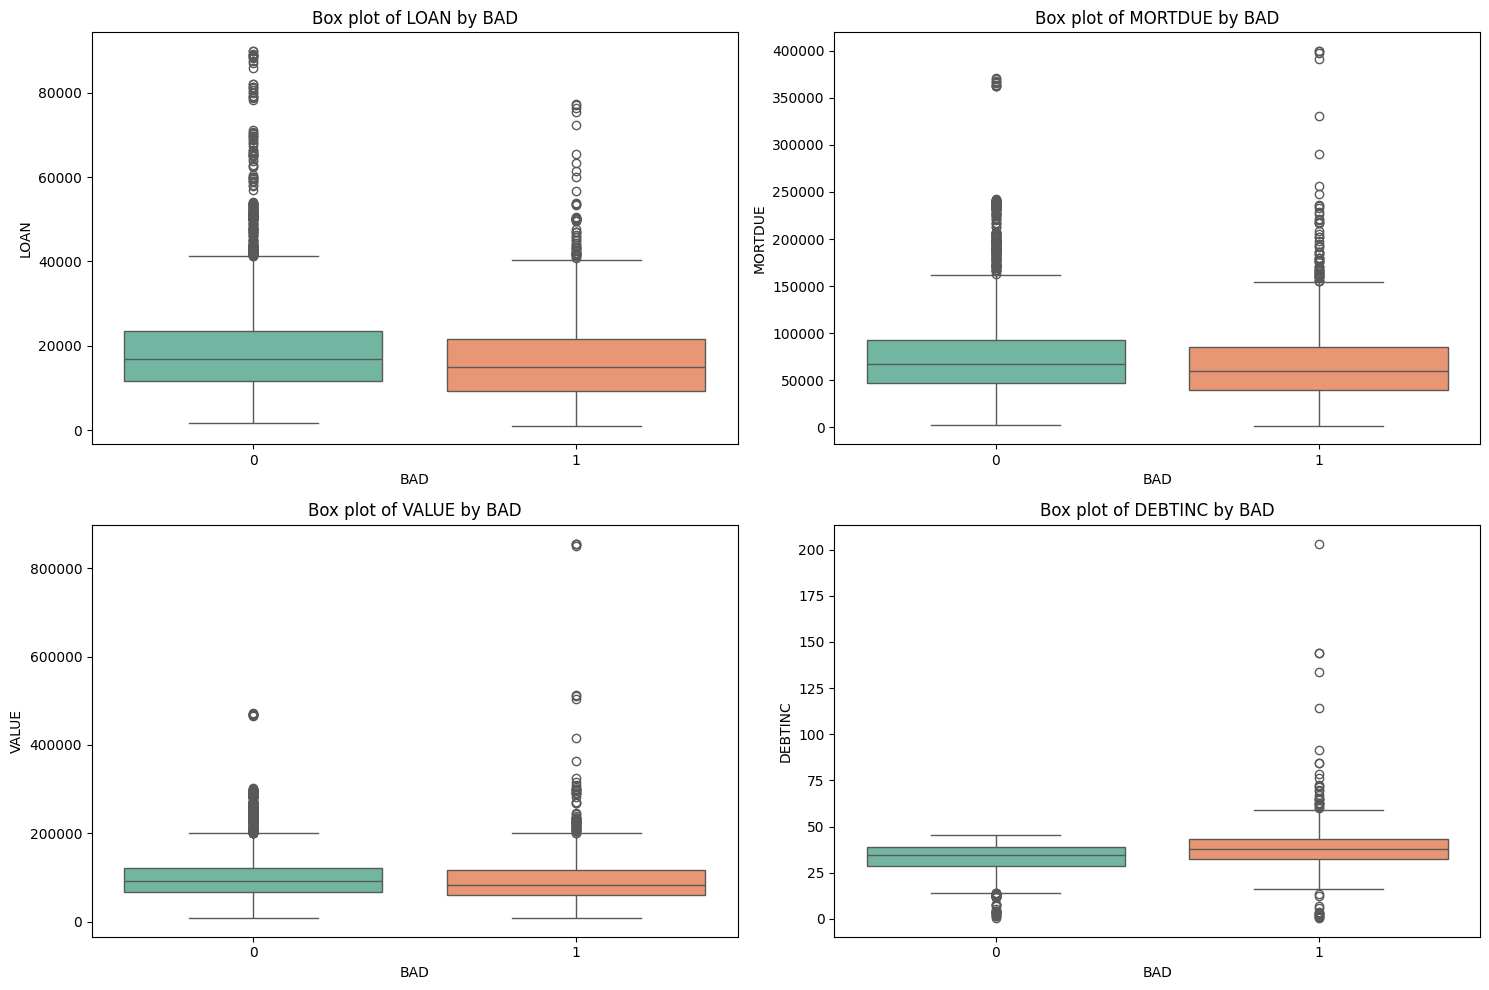

In [10]:
plt.figure(figsize=(15, 10))
variables = ['LOAN', 'MORTDUE', 'VALUE', 'DEBTINC']
for i, var in enumerate(variables, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='BAD', y=var, data=df, palette='Set2')
    plt.title(f'Box plot of {var} by BAD')
plt.tight_layout()
plt.show()

## Correlation avec la variable BAD 

In [15]:
numerical_columns = df.select_dtypes(include=['number'])
correlation_with_BAD = numerical_columns.corr()['BAD'].sort_values(ascending=False)
print(correlation_with_BAD)


BAD        1.000000
DELINQ     0.354107
DEROG      0.276081
DEBTINC    0.199835
NINQ       0.174980
CLNO      -0.004157
VALUE     -0.029954
MORTDUE   -0.048219
YOJ       -0.060238
LOAN      -0.075099
CLAGE     -0.170499
Name: BAD, dtype: float64


## Distribution de la variable BAD 

C:\Users\chemm\AppData\Local\Temp\ipykernel_60432\1395181253.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='BAD', data=df, palette='coolwarm')


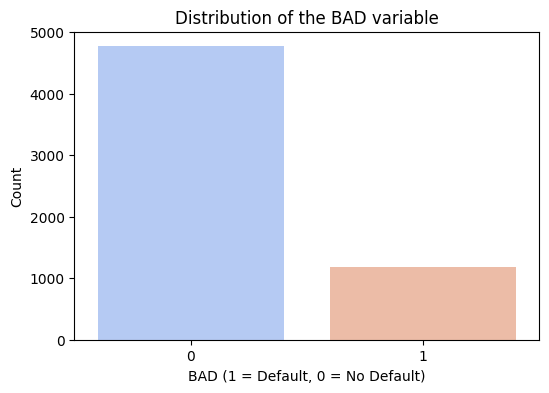

In [16]:
plt.figure(figsize=(6,4))
sns.countplot(x='BAD', data=df, palette='coolwarm')
plt.title('Distribution of the BAD variable')
plt.xlabel('BAD (1 = Default, 0 = No Default)')
plt.ylabel('Count')
plt.show()

## Vérifier la multicolinéarité avec le VIF 

In [17]:
numeric_columns = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']
X = df[numeric_columns].drop(columns=['BAD'], errors='ignore').dropna()
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data

,Variable,VIF
0,LOAN,4.699379
1,MORTDUE,17.250889
2,VALUE,22.026822
3,YOJ,2.620045
4,DEROG,1.137182
5,DELINQ,1.172314
6,CLAGE,6.174538
7,NINQ,1.552043
8,CLNO,7.524265
9,DEBTINC,9.645625


# Traitement des données 

## Création d'un data frame avec de nouvelles variables

In [18]:
df_nv=df.copy()
df_nv['MORT_VALUE'] = np.log(df_nv['VALUE'] + 1) + np.log(df_nv['MORTDUE'] + 1)
df_nv.drop(['MORTDUE', 'VALUE'], axis=1, inplace=True)
df_nv['DE_LINQ_ROG'] = df_nv['DELINQ'] + df_nv['DEROG']
df_nv.drop(['DELINQ', 'DEROG'], axis=1, inplace=True)

## Limitation des Valeurs Extrêmes par Troncature (Capping) au 99ème Percentile et Analyse Statistique

In [19]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
def count_outliers_percentile(df, column, lower_percentile=0.01, upper_percentile=0.99):
    lower_bound = df[column].quantile(lower_percentile)
    upper_bound = df[column].quantile(upper_percentile)
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers)
for col in numerical_cols:
    num_outliers = count_outliers_percentile(df, col)
    print(f'Nombre d\'outliers dans {col} (Percentiles): {num_outliers}')

Nombre d'outliers dans BAD (Percentiles): 0
Nombre d'outliers dans LOAN (Percentiles): 120
Nombre d'outliers dans MORTDUE (Percentiles): 110
Nombre d'outliers dans VALUE (Percentiles): 118
Nombre d'outliers dans YOJ (Percentiles): 30
Nombre d'outliers dans DEROG (Percentiles): 49
Nombre d'outliers dans DELINQ (Percentiles): 52
Nombre d'outliers dans CLAGE (Percentiles): 114
Nombre d'outliers dans NINQ (Percentiles): 55
Nombre d'outliers dans CLNO (Percentiles): 57
Nombre d'outliers dans DEBTINC (Percentiles): 94


In [21]:
print("="*60)
print("### Remplacement des Valeurs Extrêmes par la Moyenne ###")
print("="*60)
for col in numeric_columns:
    upper_limit = df[col].quantile(0.99)  
    mean_value = df[col].mean()  
    df[col] = np.where(df[col] > upper_limit, mean_value, df[col])
print("\n" + "="*60)
print("### Statistiques Descriptives Après Remplacement des Valeurs Extrêmes ###")
print("="*60)
statistiques = df[numeric_columns].describe()
print(statistiques)


### Remplacement des Valeurs Extrêmes par la Moyenne ###

### Statistiques Descriptives Après Remplacement des Valeurs Extrêmes ###
               LOAN        MORTDUE          VALUE          YOJ        DEROG  \
count   5960.000000    5442.000000    5848.000000  5445.000000  5252.000000   
mean   17683.153763   70324.113991   97239.293723     8.664068     0.180122   
std     8926.314573   36446.896768   44629.228163     7.161584     0.521974   
min     1100.000000    2063.000000    8000.000000     0.000000     0.000000   
25%    11100.000000   46276.000000   66075.500000     3.000000     0.000000   
50%    16300.000000   65019.000000   89235.500000     7.000000     0.000000   
75%    22600.000000   88827.250000  116815.250000    13.000000     0.000000   
max    50700.000000  199000.000000  257688.000000    29.000000     3.000000   

            DELINQ        CLAGE         NINQ         CLNO      DEBTINC  
count  5380.000000  5652.000000  5450.000000  5738.000000  4693.000000  
mean      

## Imputation des variables catégorielles

In [22]:
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = df[categorical_columns].apply(lambda col: col.fillna(col.mode()[0]))

In [23]:
df_encoded = pd.get_dummies(df, columns=['REASON', 'JOB'], drop_first=True)

## Gérer les valeurs manquantes par régression 

In [24]:
df_encoded= df_encoded.dropna(thresh=df_encoded.shape[1] - 6 + 1)

In [25]:
df1=df_encoded.copy()

In [26]:
predictor_columns = ['BAD', 'LOAN', 'REASON_HomeImp','JOB_Office','JOB_Other','JOB_ProfExe','JOB_Sales','JOB_Self']
def impute_with_regression(df, col_to_impute, predictors):
    missing_mask = df[col_to_impute].isnull()
    df_train = df_encoded[~missing_mask]
    df_missing = df_encoded[missing_mask]
    X_train = df_train[predictors]
    y_train = df_train[col_to_impute]
    X_missing = df_missing[predictors]
    reg = LinearRegression()
    reg.fit(X_train, y_train)
    predicted_values = reg.predict(X_missing)
    df.loc[missing_mask, col_to_impute] = predicted_values

In [27]:
columns_with_missing = [col for col in df1.columns if df1[col].isnull().sum() > 0]
for col in columns_with_missing:
    impute_with_regression(df1, col, predictor_columns)
print(df1.head())

   BAD    LOAN  MORTDUE     VALUE   YOJ  DEROG  DELINQ       CLAGE  NINQ  \
0    1  1100.0  25860.0   39025.0  10.5    0.0     0.0   94.366667   1.0   
1    1  1300.0  70053.0   68400.0   7.0    0.0     2.0  121.833333   0.0   
2    1  1500.0  13500.0   16700.0   4.0    0.0     0.0  149.466667   1.0   
4    0  1700.0  97800.0  112000.0   3.0    0.0     0.0   93.333333   0.0   
5    1  1700.0  30548.0   40320.0   9.0    0.0     0.0  101.466002   1.0   

   CLNO    DEBTINC  REASON_HomeImp  JOB_Office  JOB_Other  JOB_ProfExe  \
0   9.0  32.334156            True       False       True        False   
1  14.0  32.347270            True       False       True        False   
2  10.0  32.360383            True       False       True        False   
4  14.0  32.687123            True        True      False        False   
5   8.0  37.113614            True       False       True        False   

   JOB_Sales  JOB_Self  
0      False     False  
1      False     False  
2      False     False 

In [28]:
MissingData = df1.isnull().sum().rename_axis('Variables').reset_index(name='Missing Values')
MissingData['Percentage Missing'] = (MissingData['Missing Values'] / len(df1)) * 100
MissingData = MissingData.sort_values(by='Percentage Missing', ascending=False)
MissingData

,Variables,Missing Values,Percentage Missing
0,BAD,0,0.0
1,LOAN,0,0.0
2,MORTDUE,0,0.0
3,VALUE,0,0.0
4,YOJ,0,0.0
5,DEROG,0,0.0
6,DELINQ,0,0.0
7,CLAGE,0,0.0
8,NINQ,0,0.0
9,CLNO,0,0.0


## Matrice de corrélation 

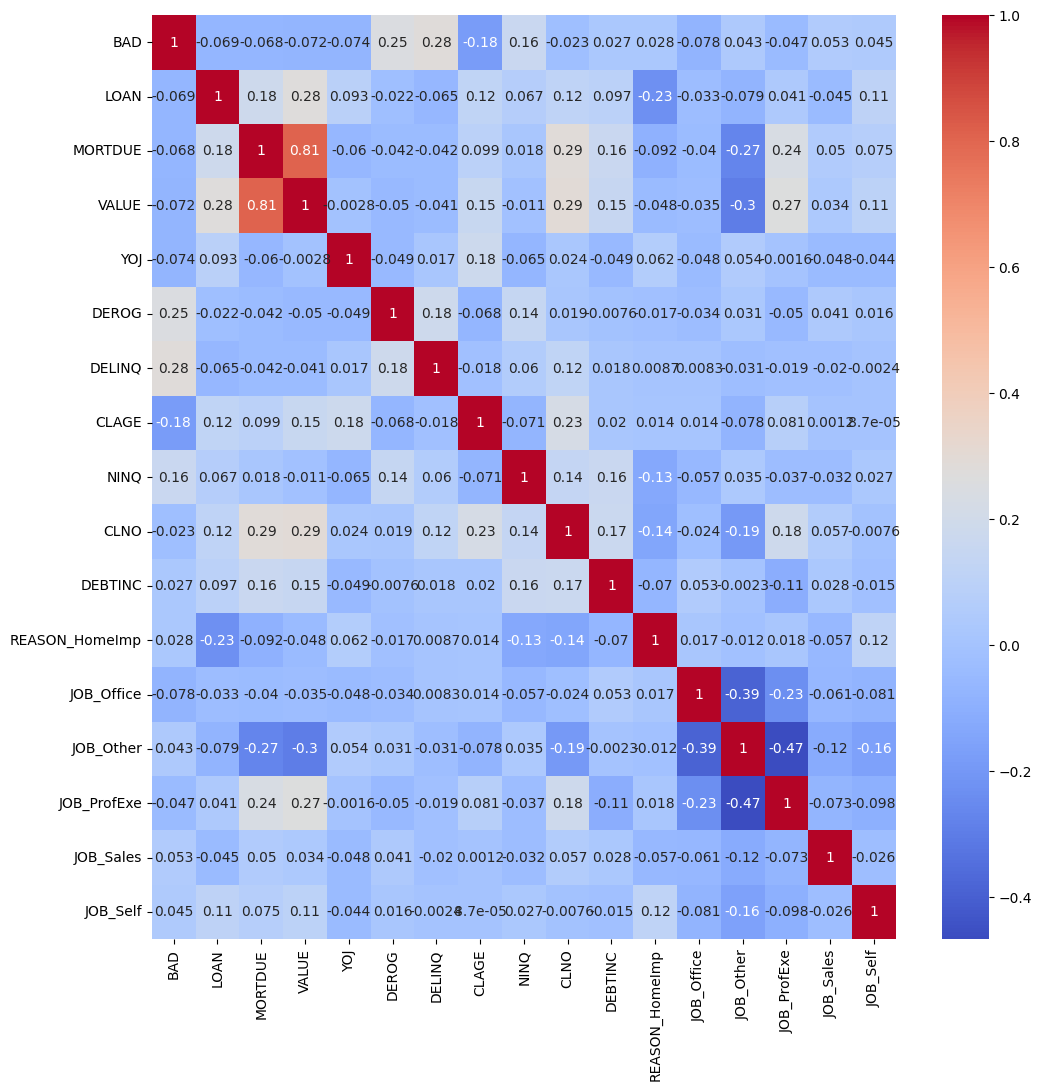

In [48]:
correlation_matrix = df1.corr()
plt.figure(figsize=(12,12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

## VIF

In [32]:
X = df1[numeric_columns].drop(columns=['BAD'], errors='ignore').dropna()
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data

,Variable,VIF
0,LOAN,5.448959
1,MORTDUE,14.585745
2,VALUE,17.982334
3,YOJ,2.638486
4,DEROG,1.184622
5,DELINQ,1.273822
6,CLAGE,6.865214
7,NINQ,1.759174
8,CLNO,7.332633
9,DEBTINC,12.391278


## Création de variables 

In [47]:
df_new_variables=df1.copy()
df_new_variables['MORT_VALUE'] = np.log(df_new_variables['VALUE'] + 1) + np.log(df_new_variables['MORTDUE'] + 1)
df_new_variables.drop(['MORTDUE', 'VALUE'], axis=1, inplace=True)
df_new_variables['DE_LINQ_ROG'] = df_new_variables['DELINQ'] + df_new_variables['DEROG']
df_new_variables.drop(['DELINQ', 'DEROG'], axis=1, inplace=True)

In [45]:
correlation_with_bad = df_new_variables.corr()['BAD'].sort_values(ascending=False)

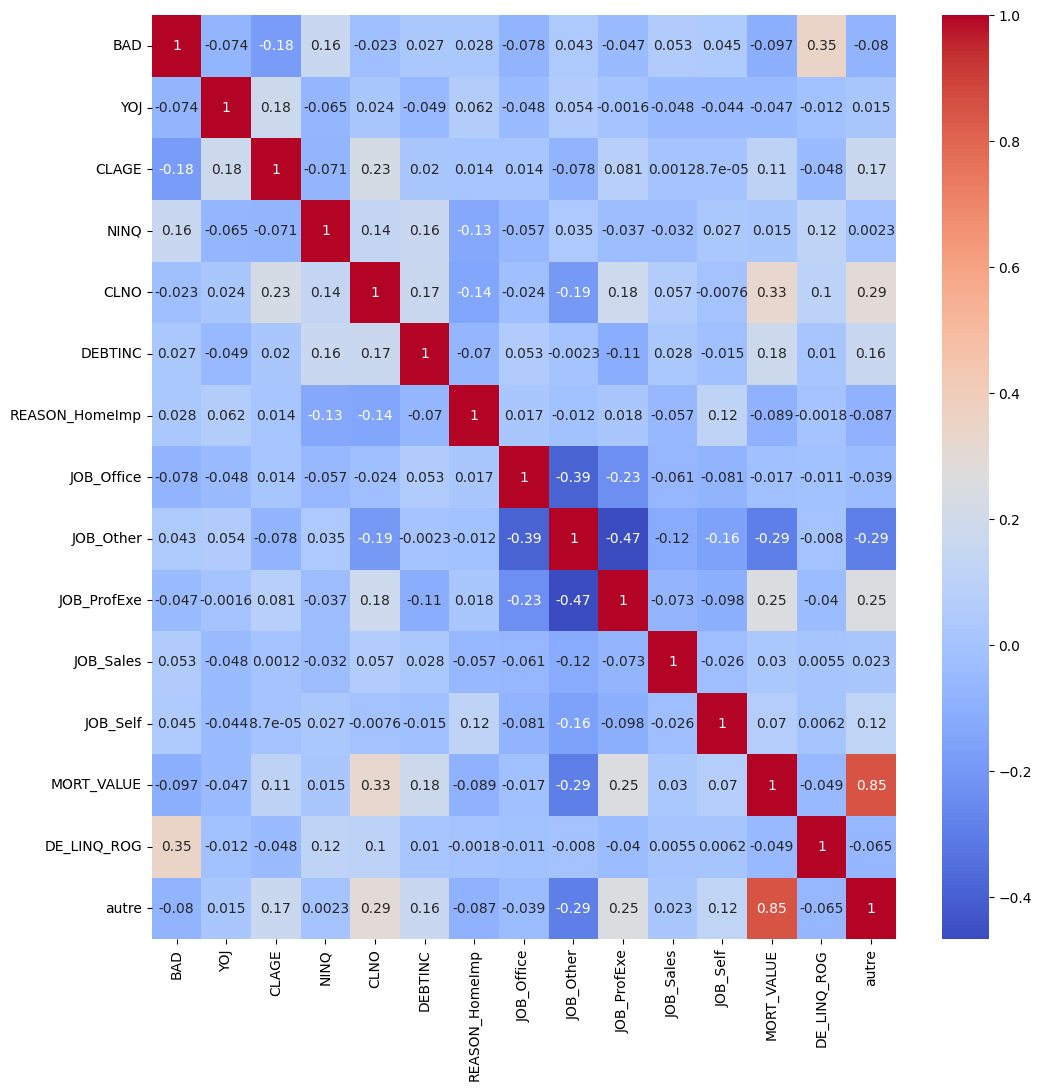

In [46]:
correlation_matrix = df_new_variables.corr()
plt.figure(figsize=(12,12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

## Rlog 1 avant selection des variables 

Matrice de confusion :
 [[680 227]
 [ 83 170]]

Rapport de classification :
              precision    recall  f1-score   support

        0.0       0.89      0.75      0.81       907
        1.0       0.43      0.67      0.52       253

avg / total       0.79      0.73      0.75      1160

Accuracy : 0.73


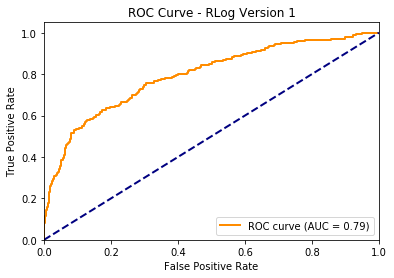

In [96]:
from sklearn.preprocessing import MinMaxScaler
X = df_new_variables.drop(columns=['BAD'])
y = df_new_variables['BAD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model_rlog_v1 = LogisticRegression(class_weight='balanced', random_state=42)
model_rlog_v1.fit(X_train_scaled, y_train)
y_pred = model_rlog_v1.predict(X_test_scaled)
conf_matrix = confusion_matrix(y_test, y_pred)
classif_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
y_prob = model_rlog_v1.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print("Matrice de confusion :\n", conf_matrix)
print("\nRapport de classification :\n", classif_report)
print(f"Accuracy : {accuracy:.2f}")
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - RLog Version 1')
plt.legend(loc="lower right")
plt.show()


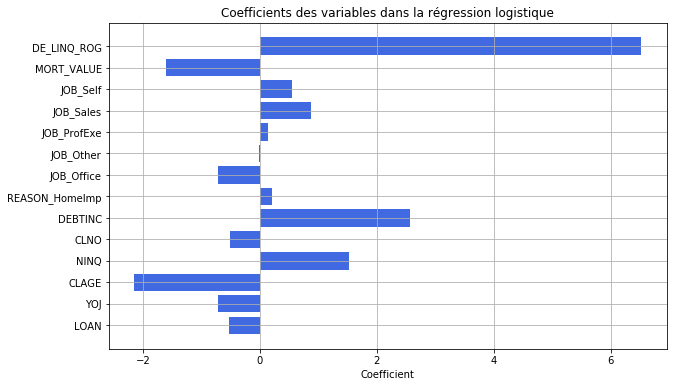

In [97]:
coefficients = model_rlog_v1.coef_[0]
variables = X.columns
plt.figure(figsize=(10, 6))
plt.barh(variables, coefficients, color='royalblue')
plt.xlabel('Coefficient')
plt.title('Coefficients des variables dans la régression logistique')
plt.grid(True)
plt.show()

## version 1 random forest 

Matrice de confusion :
 [[898   9]
 [115 138]]

Rapport de classification :
              precision    recall  f1-score   support

        0.0       0.89      0.99      0.94       907
        1.0       0.94      0.55      0.69       253

avg / total       0.90      0.89      0.88      1160

Accuracy : 0.89


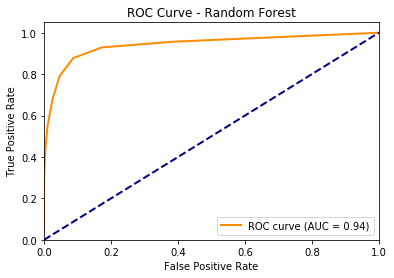

In [98]:
X = df_new_variables.drop(columns=['BAD'])
y = df_new_variables['BAD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_rf = RandomForestClassifier(class_weight='balanced', random_state=42)
model_rf.fit(X_train_scaled, y_train)

y_pred = model_rf.predict(X_test_scaled)

conf_matrix = confusion_matrix(y_test, y_pred)
classif_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

y_prob = model_rf.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

print("Matrice de confusion :\n", conf_matrix)
print("\nRapport de classification :\n", classif_report)
print(f"Accuracy : {accuracy:.2f}")

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()

## Sélection des variables

In [99]:
importances = model_rf.feature_importances_
indices = np.argsort(importances)[::-1]  # Indices triés des features par importance décroissante

# Affichage des variables par ordre d'importance
print("Importance des variables :")
for i in range(X.shape[1]):
    print(f"{X.columns[indices[i]]}: {importances[indices[i]]:.4f}")

Importance des variables :
DEBTINC: 0.2333
DE_LINQ_ROG: 0.1625
CLAGE: 0.1200
LOAN: 0.1084
MORT_VALUE: 0.1048
CLNO: 0.0815
YOJ: 0.0760
NINQ: 0.0495
REASON_HomeImp: 0.0165
JOB_Office: 0.0156
JOB_ProfExe: 0.0114
JOB_Other: 0.0111
JOB_Sales: 0.0054
JOB_Self: 0.0040


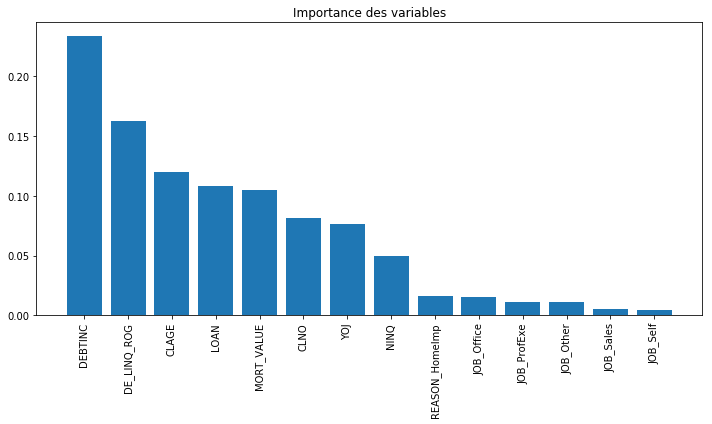

In [100]:
plt.figure(figsize=(10, 6))
plt.title("Importance des variables")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

## Rlog avec la méthode RFE 

Variables sélectionnées par RFE :
 Index(['YOJ', 'CLAGE', 'NINQ', 'DEBTINC', 'JOB_Office', 'JOB_Sales',
       'MORT_VALUE', 'DE_LINQ_ROG'],
      dtype='object')
Matrice de confusion :
 [[681 226]
 [ 84 169]]

Rapport de classification :
              precision    recall  f1-score   support

        0.0       0.89      0.75      0.81       907
        1.0       0.43      0.67      0.52       253

avg / total       0.79      0.73      0.75      1160

Accuracy : 0.73


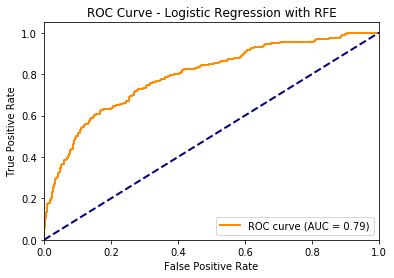

In [101]:
X = df_new_variables.drop(columns=['BAD'])
y = df_new_variables['BAD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model_log = LogisticRegression(class_weight='balanced', random_state=42)
rfe = RFE(model_log, n_features_to_select=8)  
rfe.fit(X_train_scaled, y_train)
selected_features = X.columns[rfe.support_]
print("Variables sélectionnées par RFE :\n", selected_features)
X_train_rfe = rfe.transform(X_train_scaled)
X_test_rfe = rfe.transform(X_test_scaled)
model_log.fit(X_train_rfe, y_train)
y_pred = model_log.predict(X_test_rfe)
conf_matrix = confusion_matrix(y_test, y_pred)
classif_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
y_prob = model_log.predict_proba(X_test_rfe)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print("Matrice de confusion :\n", conf_matrix)
print("\nRapport de classification :\n", classif_report)
print(f"Accuracy : {accuracy:.2f}")
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression with RFE')
plt.legend(loc="lower right")
plt.show()


## ACP

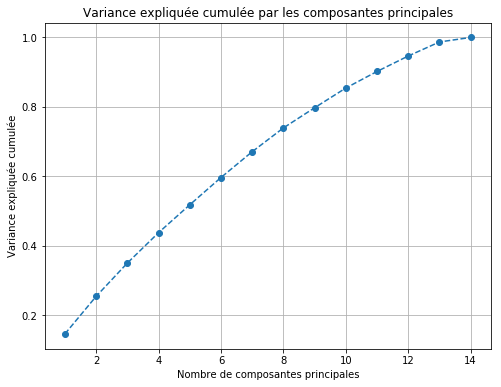

Variance expliquée par chaque composante : [ 0.14642069  0.10807901  0.09591219  0.08755402  0.08023045  0.07857736
  0.07430018  0.06846993  0.05808923  0.05677521  0.04774079  0.04446345
  0.04047246  0.01291502]
Variance expliquée cumulée : [ 0.14642069  0.25449971  0.35041189  0.43796591  0.51819636  0.59677372
  0.6710739   0.73954383  0.79763306  0.85440828  0.90214907  0.94661252
  0.98708498  1.        ]


In [102]:
X = df_new_variables.drop(columns=['BAD'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=None) 
X_pca = pca.fit_transform(X_scaled)
explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', linestyle='--')
plt.title('Variance expliquée cumulée par les composantes principales')
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Variance expliquée cumulée')
plt.grid(True)
plt.show()
print(f"Variance expliquée par chaque composante : {explained_variance}")
print(f"Variance expliquée cumulée : {explained_variance.cumsum()}")

In [103]:
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(X.shape[1])], index=X.columns)
top_components = loadings[['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8']]
print("Contributions des variables aux premières composantes principales :\n")
for pc in top_components.columns:
    print(f"Top variables for {pc}:")
    print(top_components[pc].abs().sort_values(ascending=False).head(10))  
    print("\n")


Contributions des variables aux premières composantes principales :

Top variables for PC1:
MORT_VALUE        0.492620
JOB_Other         0.459436
CLNO              0.441113
JOB_ProfExe       0.385453
LOAN              0.285697
CLAGE             0.231558
DEBTINC           0.161299
REASON_HomeImp    0.157124
JOB_Self          0.075078
NINQ              0.074855
Name: PC1, dtype: float64


Top variables for PC2:
NINQ              0.466699
REASON_HomeImp    0.405680
DEBTINC           0.400709
JOB_Other         0.395158
JOB_ProfExe       0.324247
LOAN              0.266886
JOB_Office        0.212299
CLNO              0.195080
DE_LINQ_ROG       0.172315
CLAGE             0.068986
Name: PC2, dtype: float64


Top variables for PC3:
JOB_Office     0.517128
YOJ            0.484636
CLAGE          0.376226
JOB_Other      0.336357
DEBTINC        0.232560
LOAN           0.224825
JOB_ProfExe    0.201449
DE_LINQ_ROG    0.178388
NINQ           0.166549
JOB_Sales      0.151441
Name: PC3, dtype: float64


In [104]:
# on décide de garder 
#MORT_VALUE (PC1, PC6, PC7, PC8)
#JOB_Other (PC1, PC2, PC3)
#CLNO (PC1, PC6, PC8)
#DEBTINC (PC1, PC2, PC3, PC4, PC5, PC8)
#NINQ (PC2, PC3, PC4, PC7)
#REASON_HomeImp (PC2, PC5, PC6, PC8)
#YOJ (PC3, PC4, PC5, PC6, PC7)
#DE_LINQ_ROG (PC2, PC3, PC5, PC6, PC8)

## Rlog version 2 avec les variables selectionnées

Matrice de confusion :
 [[701 206]
 [ 84 169]]

Rapport de classification :
              precision    recall  f1-score   support

        0.0       0.89      0.77      0.83       907
        1.0       0.45      0.67      0.54       253

avg / total       0.80      0.75      0.77      1160

Accuracy : 0.75


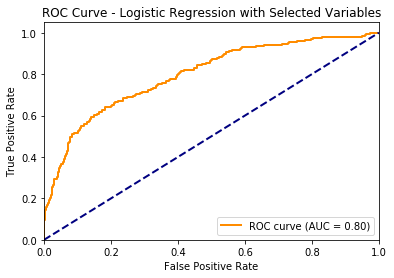

In [105]:
selected_variables = ['LOAN', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC', 'JOB_Sales', 'MORT_VALUE','DE_LINQ_ROG']

X = df_new_variables[selected_variables]
y = df_new_variables['BAD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model_log = LogisticRegression(class_weight='balanced', random_state=42)
model_log.fit(X_train_scaled, y_train)
y_pred = model_log.predict(X_test_scaled)
conf_matrix = confusion_matrix(y_test, y_pred)
classif_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
y_prob = model_log.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print("Matrice de confusion :\n", conf_matrix)
print("\nRapport de classification :\n", classif_report)
print(f"Accuracy : {accuracy:.2f}")
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression with Selected Variables')
plt.legend(loc="lower right")
plt.show()

## avec cross validation 

Meilleurs hyperparamètres :  {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
Matrice de confusion :
 [[702 205]
 [ 83 170]]

Rapport de classification :
              precision    recall  f1-score   support

        0.0       0.89      0.77      0.83       907
        1.0       0.45      0.67      0.54       253

avg / total       0.80      0.75      0.77      1160

Accuracy : 0.75


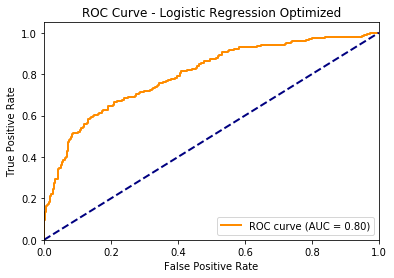

In [106]:
from sklearn.model_selection import cross_val_score, GridSearchCV
X = df_new_variables[selected_variables]
y = df_new_variables['BAD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

model_log = LogisticRegression(class_weight='balanced', random_state=42)

grid_search = GridSearchCV(estimator=model_log, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

print("Meilleurs hyperparamètres : ", grid_search.best_params_)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test_scaled)

conf_matrix = confusion_matrix(y_test, y_pred)
classif_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

y_prob = best_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

print("Matrice de confusion :\n", conf_matrix)
print("\nRapport de classification :\n", classif_report)
print(f"Accuracy : {accuracy:.2f}")

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression Optimized')
plt.legend(loc="lower right")
plt.show()

## Avec Smote

Matrice de confusion :
 [[701 206]
 [ 82 171]]

Rapport de classification :
              precision    recall  f1-score   support

        0.0       0.90      0.77      0.83       907
        1.0       0.45      0.68      0.54       253

avg / total       0.80      0.75      0.77      1160

Accuracy : 0.75


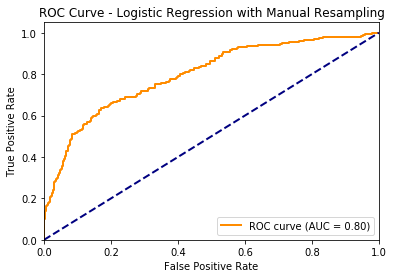

In [107]:
selected_variables = ['LOAN', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC', 'JOB_Sales', 'MORT_VALUE', 'DE_LINQ_ROG']
X = df_new_variables[selected_variables]
y = df_new_variables['BAD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
df_train = pd.concat([pd.DataFrame(X_train_scaled, columns=X.columns), pd.DataFrame(y_train.reset_index(drop=True), columns=['BAD'])], axis=1)
df_majority = df_train[df_train['BAD'] == 0]
df_minority = df_train[df_train['BAD'] == 1]
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     
                                 n_samples=len(df_majority),    
                                 random_state=42)
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
X_train_upsampled = df_upsampled.drop(columns=['BAD'])
y_train_upsampled = df_upsampled['BAD']
model_log = LogisticRegression(class_weight='balanced', random_state=42)
model_log.fit(X_train_upsampled, y_train_upsampled)
y_pred = model_log.predict(X_test_scaled)
conf_matrix = confusion_matrix(y_test, y_pred)
classif_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
y_prob = model_log.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print("Matrice de confusion :\n", conf_matrix)
print("\nRapport de classification :\n", classif_report)
print(f"Accuracy : {accuracy:.2f}")
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression with Manual Resampling')
plt.legend(loc="lower right")
plt.show()


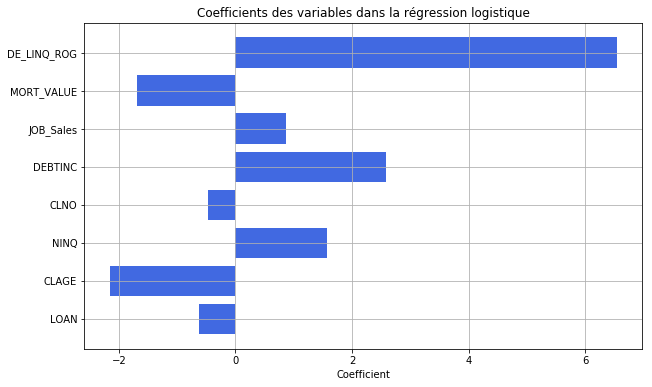

In [109]:
coefficients = model_log.coef_[0]
variables = X.columns
plt.figure(figsize=(10, 6))
plt.barh(variables, coefficients, color='royalblue')
plt.xlabel('Coefficient')
plt.title('Coefficients des variables dans la régression logistique')
plt.grid(True)
plt.show()

## Grille de score 

In [113]:
y_prob = model_log.predict_proba(X_test_scaled)[:, 1]

In [115]:
df_score_grid = pd.DataFrame({
    'LOAN': X_test['LOAN'],
    'CLAGE': X_test['CLAGE'],
    'NINQ': X_test['NINQ'],
    'CLNO': X_test['CLNO'],
    'DEBTINC': X_test['DEBTINC'],
    'JOB_Sales': X_test['JOB_Sales'],
    'MORT_VALUE': X_test['MORT_VALUE'],
    'DE_LINQ_ROG': X_test['DE_LINQ_ROG'],
    'Probability of Default': y_prob
})

In [119]:
def classify_risk(prob):
    if prob < 0.33:
        return 'Risque Faible'
    elif prob < 0.66:
        return 'Risque Moyen'
    else:
        return 'Risque Élevé'

df_score_grid['Risk Category'] = df_score_grid['Probability of Default'].apply(classify_risk)
df_score_grid = df_score_grid.sort_values(by='Probability of Default', ascending=False)
print(df_score_grid[['LOAN', 'Probability of Default', 'Risk Category']].head(10))

         LOAN  Probability of Default Risk Category
5181  27900.0                0.995116  Risque Élevé
3593  18900.0                0.991385  Risque Élevé
3286  17500.0                0.989125  Risque Élevé
3962  20800.0                0.988381  Risque Élevé
1618  11700.0                0.986095  Risque Élevé
2583  15000.0                0.985466  Risque Élevé
3086  16800.0                0.980697  Risque Élevé
32     2800.0                0.977001  Risque Élevé
775    8400.0                0.973818  Risque Élevé
68     3600.0                0.972409  Risque Élevé
